In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:


def mse(x, y, weights):
    x = np.c_[x, np.ones(x.shape[0])]
    y_pred = x.dot(weights.T)
    return sum((y - y_pred)**2)/y.shape[0]


def mse_l1(x, y, weights):
    x = np.c_[x, np.ones(x.shape[0])]
    y_pred = x.dot(weights.T)
    return sum((y - y_pred)**2)/y.shape[0] + np.sum(np.abs(weights))

def mse_l2(x, y, weights):
    x = np.c_[x, np.ones(x.shape[0])]
    y_pred = x.dot(weights.T)
    return sum((y - y_pred)**2)/y.shape[0] + np.sum(weights**2)


def mae(x, y, weights):
    x = np.c_[x, np.ones(x.shape[0])]
    y_pred = x.dot(weights.T)
    return sum(np.abs(y - y_pred))/y.shape[0]


class LinearRegression:
    def __init__(self, reg = None):
        self.reg = reg
     
    def calc_grad(self, x,y, func, step = 0.0001):
        grad = np.array([0 for i in range(self.weights.shape[0])])
        
        for i in range(len(self.weights)):
            weights = self.weights.copy()
            weights[i] += step
            grad[i] = (func(x,y, weights) - func(x, y, self.weights))/step
        return grad
    
    
    def fit(self,x_train, y_train):
        x_train = np.c_[ x_train, np.ones(x_train.shape[0])] 
        a = x_train.T.dot(x_train)
        b = x_train.T.dot(y_train)
        self.weights = np.linalg.solve(a,b)
        
    def fit_custom(self, x,y, learning_rate, func = mse):
        self.weights = np.random.normal(0,1,len(x[0])+1)
        loss = np.inf
        current_loss = func(x,y, self.weights)
        while (abs(loss - current_loss)/current_loss) > 10**(-10):
            loss = current_loss
            grad = self.calc_grad(x,y, func)
            self.weights = self.weights - grad*learning_rate
         #   print(self.weights)
            current_loss = func(x,y, self.weights)
            
        
    def predict(self, x):
        x = np.c_[ x, np.ones(x.shape[0])]
        return x.dot(self.weights.T)

        
        

In [10]:
data = pd.read_csv('Fish.csv')
x = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = data['Weight']

x = x.to_numpy()
y = y.to_numpy()

x[:,0] = x[:,0]/np.linalg.norm(x[:,0])
x[:,1] = x[:,1]/np.linalg.norm(x[:,1])
x[:,2] = x[:,2]/np.linalg.norm(x[:,2])
x[:,3] = x[:,3]/np.linalg.norm(x[:,3])
x[:,4] = x[:,4]/np.linalg.norm(x[:,4])

model = LinearRegression()
model.fit_custom(x,y,0.01, mse)

In [8]:

model.weights

array([-1.41516736, -0.12126762, -0.56054637, -0.56483999, -1.01129519,
       -0.47749535])

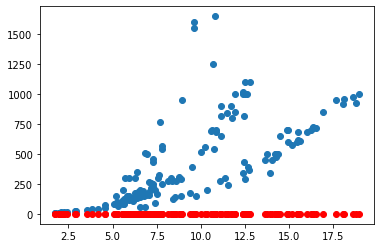

In [9]:

data_x = data['Height']
y = data['Weight']
y_pred = model.predict(x)


plt.scatter(data_x,y)
plt.scatter(data_x, y_pred, c = 'r')

In [136]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_pred, y)

284.13831490631964

In [5]:
pd.read_csv('Covid Data.csv').head(1000).to_excel('test.xlsx')